# Importing Libraries

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

# Importing Dataset

In [252]:
df=pd.read_csv('/content/Train.csv')

# Exploratory Data Analysis

In [253]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [254]:
df.shape

(8523, 12)

In [255]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [257]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [258]:
df['Item_Weight'].count()

7060

In [259]:
df['Outlet_Size'].count()

6113

In [260]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

# DATA VISUALIZATION
Created html file for detail Visualization

In [261]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df,title="bigmart",html={"style": {"full_width": True}}, sort=None)



In [262]:
# profile.to_notebook_iframe()                                                   (code to show visualization in the ide)

In [263]:
#  (Creating html file)
    
# profile.to_file(output_file='C:\\Users\\user\\Desktop\\python new\\Train.csv.html')               

In [264]:
df.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

# Handling the Missing Values

In [265]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)


In [266]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [267]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [268]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [269]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [270]:
df.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [271]:
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [272]:
df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

# Label Encoding the categorical variables

In [273]:
from sklearn.preprocessing import LabelEncoder
lbe_enc = LabelEncoder()
df['Item_Fat_Content']=lbe_enc.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=lbe_enc.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=lbe_enc.fit_transform(df['Outlet_Identifier'])
df['Outlet_Location_Type']=lbe_enc.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=lbe_enc.fit_transform(df['Outlet_Type'])
df['Outlet_Size']=lbe_enc.fit_transform(df['Outlet_Size'])
df['Item_Identifier']=lbe_enc.fit_transform(df['Item_Identifier'])


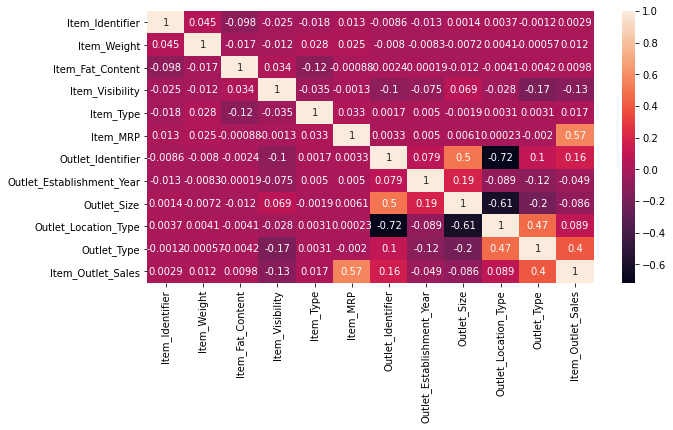

In [274]:
corrmatrix = df.corr()
plt.subplots(figsize = (10, 5))
sns.heatmap(corrmatrix, annot = True)

# SPLITTING THE DATASET INTO X & Y

In [275]:
x=df.drop("Item_Outlet_Sales",axis=1)
Y=df['Item_Outlet_Sales']

In [276]:
x 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


In [277]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# SPLITTING THE DATASET INTO X Train,Test & Y Train,Test

In [280]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=42)

In [281]:
x_train.shape

(6818, 11)

In [282]:
Y_train.shape

(6818,)

In [283]:
x_test.shape

(1705, 11)

In [284]:
Y_test.shape

(1705,)

In [285]:
# pip install xgboost              

In [286]:

from xgboost import XGBRegressor

In [287]:
from sklearn.metrics import r2_score,mean_squared_error

In [288]:
xg=XGBRegressor()
model_test=xg.fit(x_train,Y_train)
Y_predict_test=model_test.predict(x_test)
r_test=r2_score(Y_test,Y_predict5)
print("R2 Score of XG=",r_test)

[09:39:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score of XG= 0.6045879677685391


In [289]:
model_train=xg.fit(x_train,Y_train)
Y_predict_train=model_train.predict(x_train)
r_train=r2_score(Y_train,Y_predict_train)
print("R2 Score of XG_train=",r_train)

[09:39:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score of XG_train= 0.6306285217691233


# Test Dataset Handling

# Importing Libraries

In [291]:
df1=pd.read_csv('/content/Test.csv')

# Exploratory Data Analysis

In [292]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [293]:
df1.shape

(5681, 11)

In [294]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [295]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [296]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# DATA VISUALIZATION

In [297]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df,title="bigmart",html={"style": {"full_width": True}}, sort=None)


In [298]:
# profile.to_notebook_iframe()                                                   (code to show visualization in the ide)                   

In [299]:
# (Creating html file)

# profile.to_file(output_file='C:\\Users\\user\\Desktop\\python new\\Test.csv.html')    

# Handling the Missing Values

In [300]:
df1['Item_Weight'].fillna(df1['Item_Weight'].mean(),inplace=True)
df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode()[0],inplace=True)

In [301]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Label Encoding the categorical variables

In [302]:

lbe_enc = LabelEncoder()
df1['Item_Fat_Content']=lbe_enc.fit_transform(df1['Item_Fat_Content'])
df1['Item_Type']=lbe_enc.fit_transform(df1['Item_Type'])
df1['Outlet_Identifier']=lbe_enc.fit_transform(df1['Outlet_Identifier'])
df1['Outlet_Location_Type']=lbe_enc.fit_transform(df1['Outlet_Location_Type'])
df1['Outlet_Type']=lbe_enc.fit_transform(df1['Outlet_Type'])
df1['Outlet_Size']=lbe_enc.fit_transform(df1['Outlet_Size'])
df1['Item_Identifier']=lbe_enc.fit_transform(df1['Item_Identifier'])

In [303]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


# Prediction in the model with test dataset

In [304]:
Y_predict_test_data=lr.predict(df1)

# Creating subbmission/output file

In [305]:
output=model1.predict(df1).astype(int)
df_output=pd.DataFrame()
aux=pd.read_csv('/content/Test.csv')
df_output['Item_Identifier']=aux['Item_Identifier']
df_output['Item_Outlet_Sales']=output


In [306]:
# df_output[['Item_Identifier','Item_Outlet_Sales']].to_csv('output.csv',index=False)